<a href="https://colab.research.google.com/github/keymemory/Machine_Learning_Second/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==1.15

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.3.0

     |████████████████████████████████| 412.3MB 37kB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 512kB 37.7MB/s 
     |████████████████████████████████| 3.8MB 43.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=1ba4ca76431b9942e98d20f457256b3a1cb5578c19cf5fd8c07a06fc5d4ea8d1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probabi

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch : 1 	cost : 2.855624337846583
epoch : 2 	cost : 1.150675386894834
epoch : 3 	cost : 0.9042353263768282
epoch : 4 	cost : 0.7860052075711166
epoch : 5 	cost : 0.711789255900817
epoch : 6 	cost : 0.6601938520507374
epoch : 7 	cost : 0.6205227073485198
epoch : 8 	cost : 0.5889018491452388
epoch : 9 	cost : 0.5632326699657876
epoch : 10 	cost : 0.5411880917982624
epoch : 11 	cost : 0.5228314079615194
epoch : 12 	cost : 0.5068875489316205
epoch : 13 	cost : 0.4930942046371374
epoch : 14 	cost : 0.4806007983603262
epoch : 15 	cost : 0.46961276081475295
=====학습 종료!=====
Accuracy:  0.8843
Label:  [5]
Prediction:  [5]


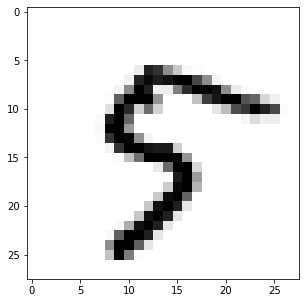

In [ ]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터 로드
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
# 0 ~ 9
classes = 10
# 28 * 28 = 784
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, classes])

W = tf.Variable(tf.random_normal([784, classes]), name='weight')
b = tf.Variable(tf.random_normal([classes]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# epoch : 데이터를 몇 번 학습시킬지
#         (예를 들어 100개의 데이터가 있을경우 100개를 한번 모두 학습하면 1epoch)
# batch : 데이터의 양이 많은 경우 조금씩 데이터를 메모리에 올리면서 학습
#         (예를 들어 batch가 20인 경우 5번 반복하면 1epoch)
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): # 총 15번 반복 학습한다는 의미
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch): # 1epoch
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('epoch :', epoch + 1, '\tcost :', avg_cost)
        
    print('=====학습 종료!=====')
    # 학습결과 테스트
    # eval은 sess.run과 동일하게 동작함
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: 
                        mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(prediction, feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.figure(figsize=(5, 5))
    image = np.reshape(mnist.test.images[r:r + 1], [28, 28])
    plt.imshow(image, cmap='Greys')
    plt.show()
                            
